In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

BASE_PATH = '/home/guillermo/Documents/SINC/RNA/analysis/AEseq2seq/'
DATA_PATH = 'notebooks/from_db/Unet/v2/'

In [104]:
sns.set_theme(style="whitegrid", palette="pastel")

In [105]:
data_conv = pd.read_csv(BASE_PATH + DATA_PATH + 'convolutional_layers/params_best_epoch.csv')
metrics_conv = pd.read_csv(BASE_PATH + DATA_PATH + 'convolutional_layers/train_metrics.csv')

In [106]:
data_conv.columns

Index(['run_uuid', 'name', 'best_epoch', 'arc_filters', 'arc_rank',
       'arc_kernel', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1',
       'arc_num_conv2', 'arc_skip_conn', 'hyp_lr', 'hyp_output_th',
       'hyp_scheduler', 'best_epoch.1', 'train_loss', 'train_Accuracy',
       'train_Accuracy_seq', 'train_F1', 'valid_loss', 'valid_Accuracy',
       'valid_Accuracy_seq', 'valid_F1', 'test_loss', 'test_Accuracy',
       'test_Accuracy_seq', 'test_F1'],
      dtype='object')

In [107]:
data_pool = pd.read_csv(BASE_PATH + DATA_PATH + 'pooling_layers/params_best_epoch.csv')
metrics_pool = pd.read_csv(BASE_PATH + DATA_PATH + 'pooling_layers/train_metrics.csv')

In [108]:
data_c_skips = data_conv[data_conv['arc_skip_conn'] == 1]
data_pool_skips = data_pool[data_pool['arc_skip_conn'] == 1]
data_c_no_skips = data_conv[data_conv['arc_skip_conn'] == 0]
data_pool_no_skips = data_pool[data_pool['arc_skip_conn'] == 0]

In [109]:
data_conv.columns

Index(['run_uuid', 'name', 'best_epoch', 'arc_filters', 'arc_rank',
       'arc_kernel', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1',
       'arc_num_conv2', 'arc_skip_conn', 'hyp_lr', 'hyp_output_th',
       'hyp_scheduler', 'best_epoch.1', 'train_loss', 'train_Accuracy',
       'train_Accuracy_seq', 'train_F1', 'valid_loss', 'valid_Accuracy',
       'valid_Accuracy_seq', 'valid_F1', 'test_loss', 'test_Accuracy',
       'test_Accuracy_seq', 'test_F1'],
      dtype='object')

In [110]:
data_conv[['name', 'arc_filters', 'arc_rank', 'arc_num_conv1','arc_num_conv2', 'arc_skip_conn', 'best_epoch','train_Accuracy', 'valid_Accuracy', 'test_Accuracy']].sort_values(['arc_rank', 'arc_skip_conn'])

,name,arc_filters,arc_rank,arc_num_conv1,arc_num_conv2,arc_skip_conn,best_epoch,train_Accuracy,valid_Accuracy,test_Accuracy
0,UNet-no-skips-num_convs-1-1,4,8,1,1,0,13,0.999939,0.999890,1.000000
1,UNet-no-skips-num_convs-1-2,4,8,1,2,0,17,0.999572,0.999482,0.999882
6,UNet-num_convs-1-1,4,8,1,1,1,19,0.999996,1.000000,1.000000
7,UNet-num_convs-1-2,4,8,1,2,1,19,1.000000,1.000000,1.000000
2,UNet-no-skips-num_convs-2-1,4,16,2,1,0,19,0.999721,0.999900,1.000000
3,UNet-no-skips-num_convs-2-2,4,16,2,2,0,19,0.999669,0.999621,0.999983
8,UNet-num_convs-2-1,4,16,2,1,1,19,0.999984,1.000000,1.000000
9,UNet-num_convs-2-2,4,16,2,2,1,18,0.999986,1.000000,1.000000
4,UNet-no-skips-num_convs-3-1,4,32,3,1,0,18,0.999713,0.999641,0.999949
5,UNet-no-skips-num_convs-3-2,4,32,3,2,0,19,0.994073,0.990543,0.992179


In [111]:
data_pool[['run_uuid','name', 'arc_filters', 'arc_rank',  'arc_num_conv1','arc_num_conv2', 'arc_skip_conn', 'best_epoch','train_Accuracy', 'valid_Accuracy', 'test_Accuracy']].sort_values(['name','arc_rank', 'arc_skip_conn']).query('best_epoch >2')

,run_uuid,name,arc_filters,arc_rank,arc_num_conv1,arc_num_conv2,arc_skip_conn,best_epoch,train_Accuracy,valid_Accuracy,test_Accuracy
0,8afe65f58de84eabbfd4b76921f13285,UNet-v2-avg-pooling-no-skips-num_convs-1-1,4,8,1,1,0,17,0.992035,0.991241,0.988340
1,ecf3cff322d5488493309c89730b98ef,UNet-v2-avg-pooling-no-skips-num_convs-1-2,4,8,1,2,0,19,0.925779,0.906340,0.908498
2,f267f3a4346f48a9b6a8e652634232b3,UNet-v2-avg-pooling-no-skips-num_convs-1-3,4,8,1,3,0,18,0.871350,0.846889,0.846663
3,a192abf37c7d4da59201a189c40de13a,UNet-v2-avg-pooling-no-skips-num_convs-2-1,4,16,2,1,0,17,0.976785,0.964425,0.962992
4,fd35bd3bfb374d27b182f8c4abec0974,UNet-v2-avg-pooling-no-skips-num_convs-2-2,4,16,2,2,0,17,0.895994,0.851692,0.858609
5,4691670788304764a7b22d15e806d2a0,UNet-v2-avg-pooling-no-skips-num_convs-2-3,4,16,2,3,0,19,0.887818,0.842594,0.846318
6,38aebbcfe3be4882b0066486e67c4ef1,UNet-v2-avg-pooling-no-skips-num_convs-3-1,4,32,3,1,0,19,0.909666,0.860371,0.864940
7,09d6ea077ccd416c9af2355a0fe602c0,UNet-v2-avg-pooling-no-skips-num_convs-3-2,4,32,3,2,0,19,0.897427,0.846460,0.856319
8,ae2c4f31ca6e4e4b9464d27bf8a4a93a,UNet-v2-avg-pooling-no-skips-num_convs-3-3,4,32,3,3,0,16,0.873291,0.839784,0.848911
9,181c5f350c01442093c89c5889e1e5c5,UNet-v2-avg-pooling-num_convs-1-1,4,8,1,1,1,18,0.999853,0.999900,0.999672


# conv analysis


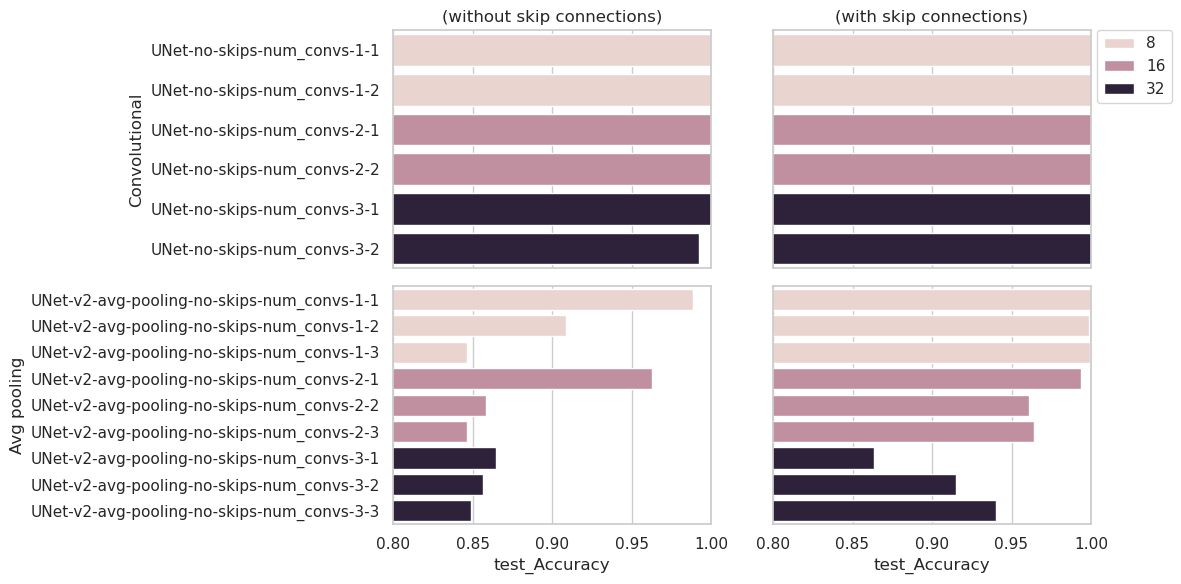

In [136]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True)

g = sns.barplot(data=data_c_no_skips.sort_values(by=['name']), x='test_Accuracy', y='name', hue='arc_rank',legend=False,  ax=axes[0, 0])
g.set_title('(without skip connections)') 
g.set_xlim([0.8, 1])

g.set(ylabel='Convolutional')

g = sns.barplot(data=data_c_skips.sort_values(by=['name']), x='test_Accuracy', y='name', hue='arc_rank', ax=axes[0, 1])
g.set_title('(with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])
g.set_yticklabels([])
g.set(ylabel='')


g = sns.barplot(data=data_pool_no_skips.sort_values(by=['name']), x='test_Accuracy', y='name', hue='arc_rank', legend=False, ax=axes[1, 0])
g.set_xlim([0.8, 1])
g.set(ylabel='Avg pooling')

g = sns.barplot(data=data_pool_skips.sort_values(by=['name']), x='test_Accuracy', y='name', hue='arc_rank', legend=False,  ax=axes[1, 1])
g.set_yticklabels([])
g.set(ylabel='')

g.set_xlim([0.8, 1])
fig.tight_layout()

(0.8, 1.0)

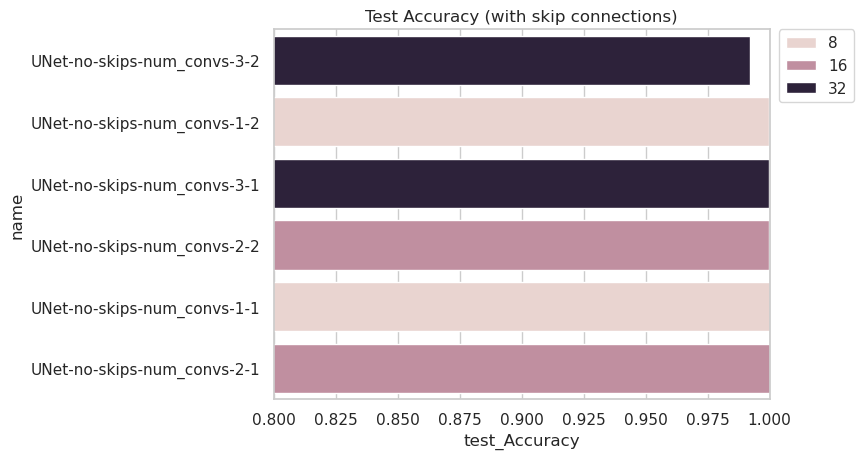

In [73]:
g = sns.barplot(data=data_c_no_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_rank')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])

(0.8, 1.0)

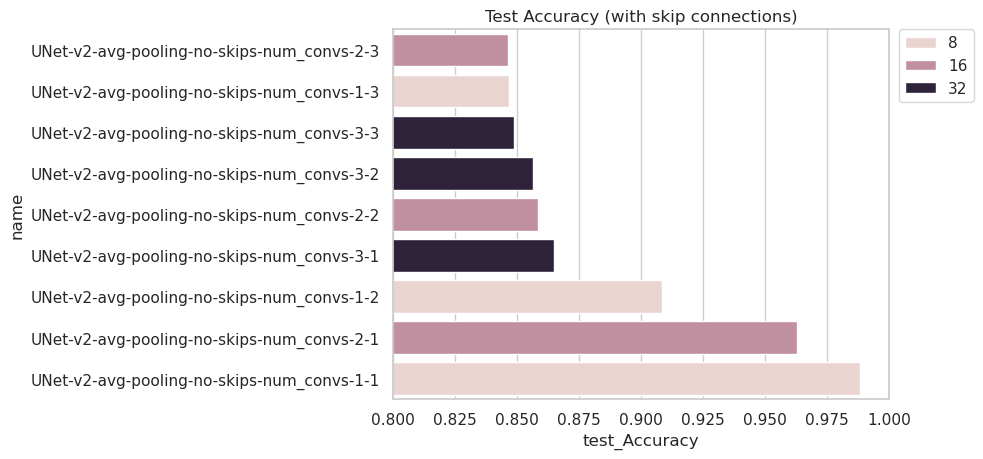

In [84]:
g = sns.barplot(data=data_pool_no_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_rank')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])

(0.8, 1.0)

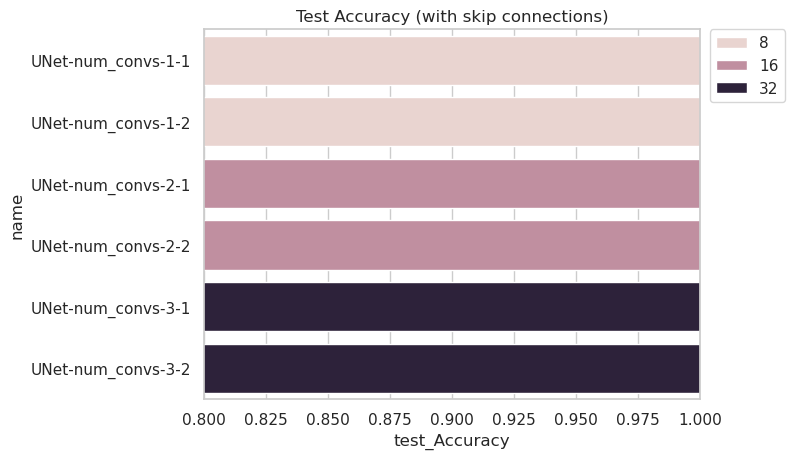

In [75]:
g = sns.barplot(data=data_c_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_rank')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])

(0.8, 1.0)

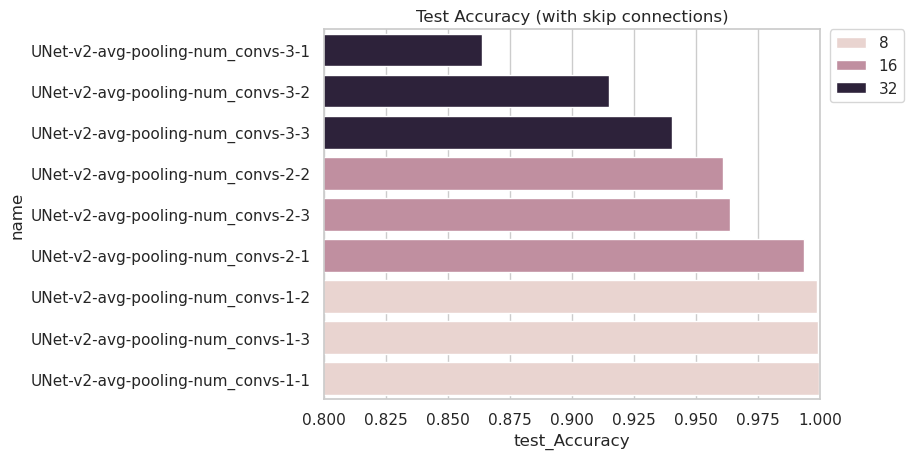

In [74]:
g = sns.barplot(data=data_pool_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_rank')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])

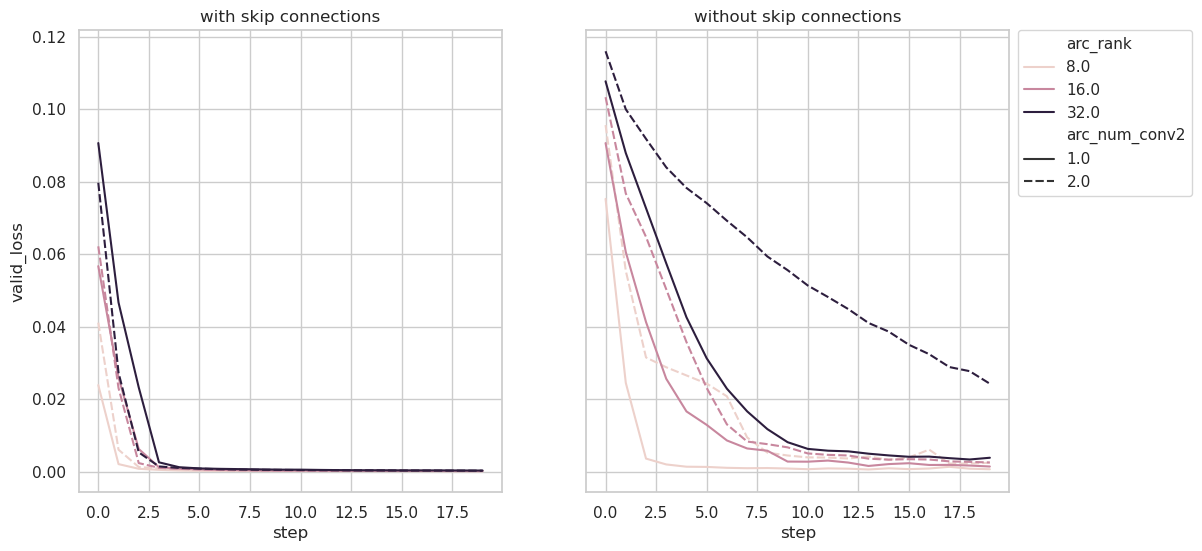

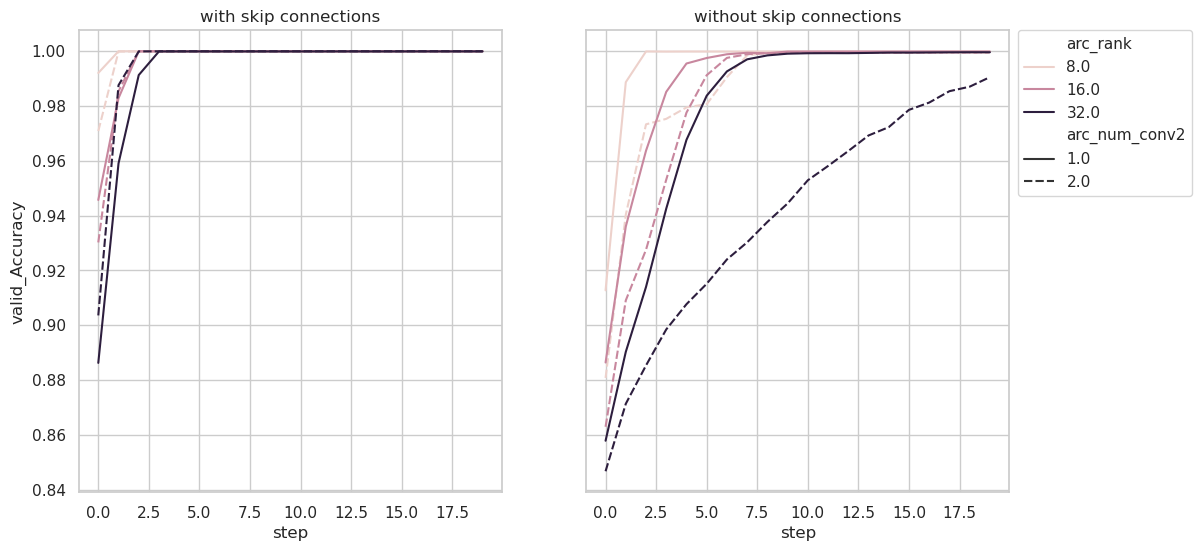

In [69]:
cols = ['run_uuid', 'arc_filters', 'arc_rank', 'arc_num_conv1','arc_num_conv2', 'arc_skip_conn']
metrics_skips = pd.merge(metrics_conv, data_c_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')
metrics_no_skips = pd.merge(metrics_conv, data_c_no_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_skips, x='step', y='valid_loss', style='arc_num_conv2', hue='arc_rank', ax=ax[0], legend=False)
# g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_loss', style='arc_num_conv2', hue='arc_rank', ax=ax[1])
f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# f.grid()
f.set_title('without skip connections')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_skips, x='step', y='valid_Accuracy', style='arc_num_conv2', hue='arc_rank', ax=ax[0], legend=False)
# g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy', style='arc_num_conv2', hue='arc_rank', ax=ax[1])
f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# f.grid()
f.set_title('without skip connections')

plt.show()

Text(0.5, 1.0, 'without skip connections')

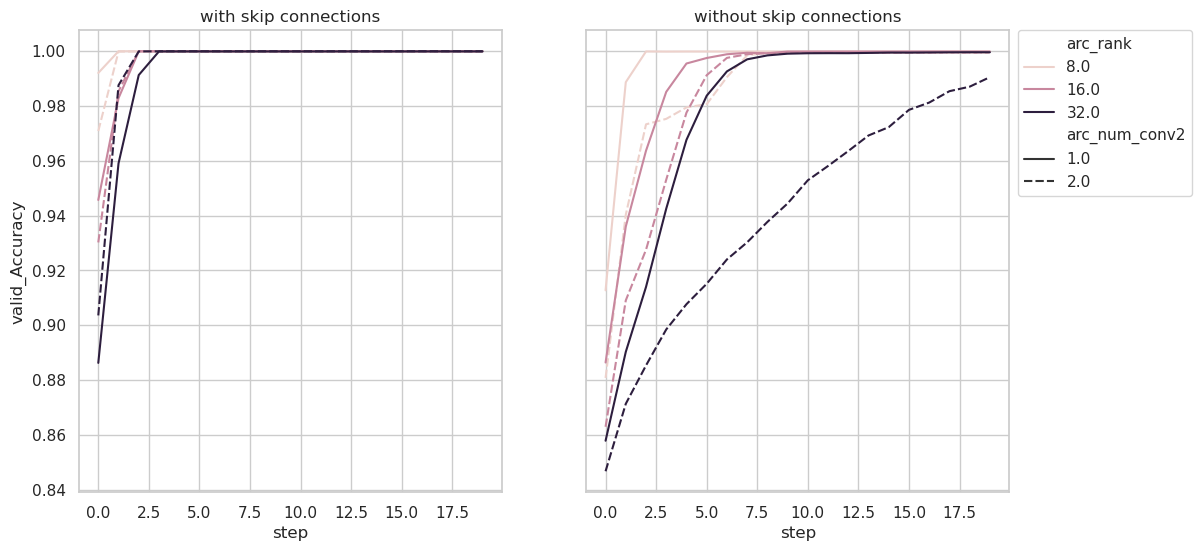